In [1]:
from IPython.core.pylabtools import figsize
%matplotlib inline
import math
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

simulator = AerSimulator()

In [2]:
def run_with_plot(circuit, shots=1024, ax=None, should_show_close=True, figsize=None):
    counts = simulator.run(circuit, shots=shots).result().get_counts(circuit)
    if should_show_close:
        plt.close()
    plot_histogram(counts, ax=ax, figsize=figsize)
    if should_show_close:
        plt.show()
        plt.close()


def draw_bloch_sphere(state):
    plt.close()
    plot_bloch_multivector(state)
    plt.show()
    plt.close()


def bloch_coords(a, b):
    x = round(float((b.conjugate() * a + b * a.conjugate()).real), 5)
    y = round(float((1j * (b.conjugate() * a - b * a.conjugate())).real), 5)
    z = round(float((a * a.conjugate() - b * b.conjugate()).real), 5)
    return x, y, z


def cartesian_to_spherical(x, y, z):
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = math.degrees(math.atan2(math.sqrt(x ** 2 + y ** 2), z))
    phi = math.degrees(math.atan2(y, x) if r != 0 else 0)
    return phi, theta, r


def draw_circuit(circuit):
    plt.close()
    circuit.draw('mpl')
    plt.show()
    plt.close()

# –£–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ 1

### 2)
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É, —Å–æ—Å—Ç–æ—è—â—É—é –∏–∑ –¥–≤—É—Ö
–∫—É–±–∏—Ç–æ–≤. –£—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫—É–±–∏—Ç–∞ —Å–æ—Å—Ç–æ—è–Ω–∏–µ |0>, –∞ –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ - —Å–æ—Å—Ç–æ—è–Ω–∏–µ |1>. –î–æ–±–∞–≤—å—Ç–µ –æ–ø–µ—Ä–∞—Ü–∏—é –∏–∑–º–µ—Ä–µ–Ω–∏—è –¥–ª—è –æ–±–æ–∏—Ö –∫—É–±–∏—Ç–æ–≤ –∏ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ
–ø–æ–ª—É—á–∏–≤—à—É—é—Å—è —Å—Ö–µ–º—É –≤ —Ä–µ–∂–∏–º–µ —Å–∏–º—É–ª—è—Ü–∏–∏.

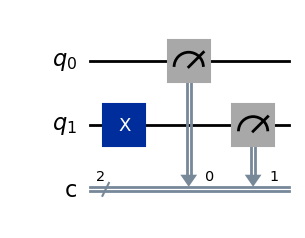

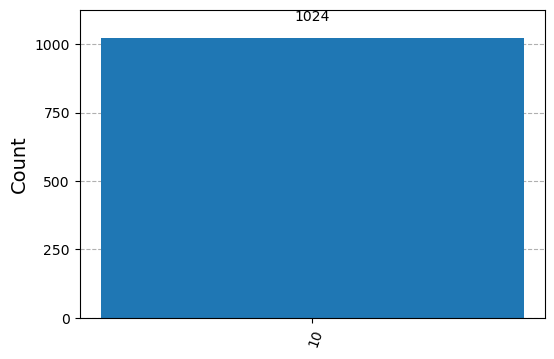

In [3]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[1])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
run_with_plot(circuit, figsize=figsize(6, 4))

### 3)
–ü—Ä–∏–≤–µ–¥–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ $\left( \sqrt{\frac{1}{2}}(|0\rangle + |1\rangle) \right)$. –ü—Ä–∏–º–µ–Ω–∏—Ç–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –∫ –∫—É–±–∏—Ç—É. –î–ª—è —Å–æ–∑–¥–∞–Ω–Ω–æ–π —Å—Ö–µ–º—ã –≤—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Å —á–∏—Å–ª–æ–º –∑–∞–ø—É—Å–∫–æ–≤: 1, 2, 8, 32, 64, 128, 512, 1024, 8192. –ù–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.


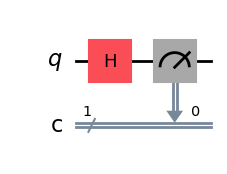

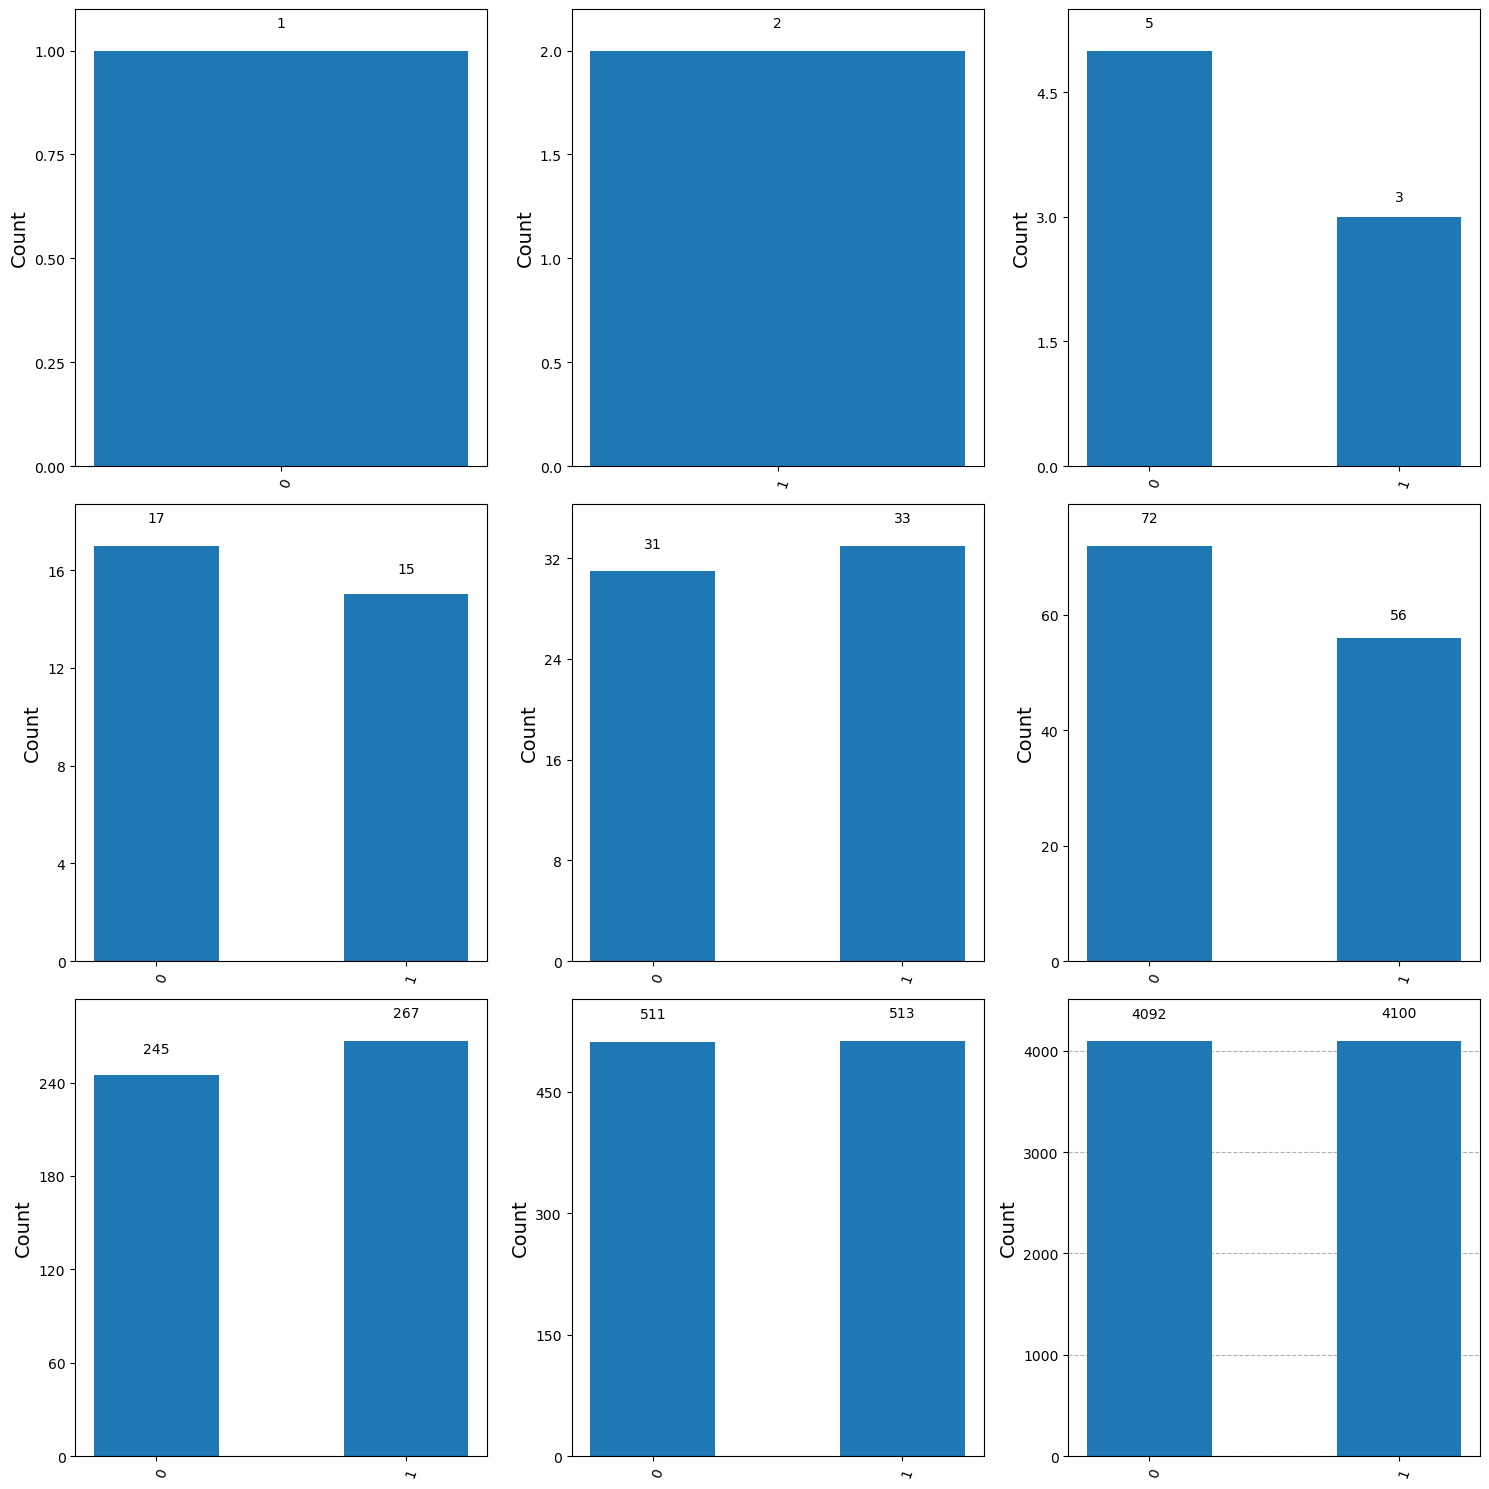

In [4]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
draw_circuit(circuit)
fig, axs = plt.subplots(3, 3, figsize=figsize(15, 15))
for i, shots_num in enumerate([1, 2, 8, 32, 64, 128, 512, 1024, 8192]):
    run_with_plot(circuit, shots=shots_num, ax=axs[i // 3, i % 3], should_show_close=False)
plt.tight_layout()
plt.show()

–ü—Ä–∏ –º–∞–ª–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∏–∑–º–µ—Ä–µ–Ω–∏–π —Å–ª–æ–∂–Ω–æ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–∞, –æ–¥–Ω–∞–∫–æ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —á–∏—Å–ª–∞ –∑–∞–ø—É—Å–∫–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –Ω–∞—á–∏–Ω–∞–µ—Ç —Å—Ö–æ–¥–∏—Ç—å—Å—è –∫ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–º—É (–ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–≥–æ –∫–≤–∞–Ω—Ç–æ–≤–æ–≥–æ –∫–æ–º–ø—å—é—Ç–µ—Ä–∞, –∑–¥–µ—Å—å –ø–æ–¥–æ–±–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è)  

### 4) 
–°–æ–±–µ—Ä–∏—Ç–µ –∫–≤–∞–Ω—Ç–æ–≤—ã–µ —Å—Ö–µ–º—ã, –ø–æ–∫–∞–∑–∞–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å. 17
<br>
–ó–∞–ø—É—Å—Ç–∏—Ç–µ 512 —Å–∏–º—É–ª—è—Ü–∏–π –¥–∞–Ω–Ω—ã—Ö —Å—Ö–µ–º. –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.



![png17](images/lab1/img17.png)

4a; corrected?


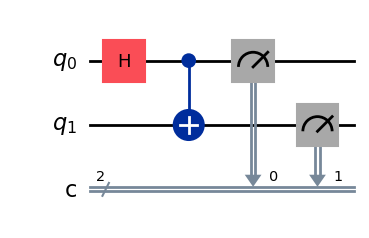

initial


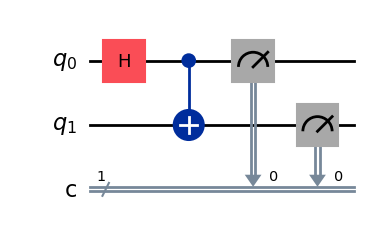

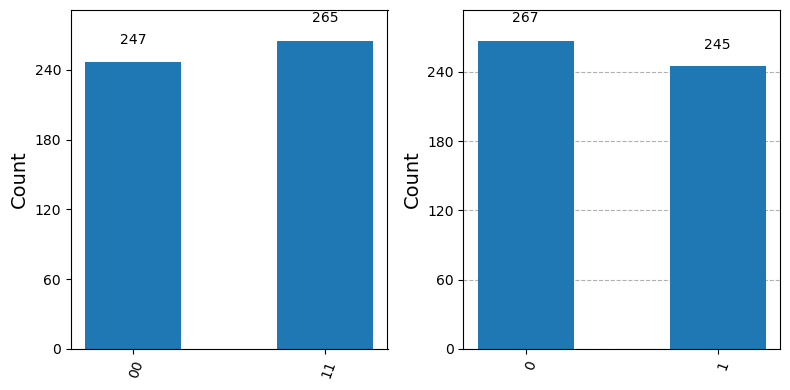

In [5]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4a; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[0], q_reg[1])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])

print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

–•–æ—Ç—è, –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –∑–¥–µ—Å—å –Ω–µ—Ç –±–æ–ª—å—à–æ–π —Ä–∞–∑–Ω–∏—Ü—ã, –∏–∑–º–µ—Ä—è—Ç—å –ª–∏ –æ–±–∞ –∫—É–±–∏—Ç–∞ –∏–ª–∏ –ø–µ—Ä–µ–∑–∞–ø–∏—Å—ã–≤–∞—Ç—å –æ–±—ã—á–Ω—ã–π –±–∏—Ç –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤—Ç–æ—Ä–æ–≥–æ –∫—É–±–∏—Ç–∞, —Ç–∞–∫ –∫–∞–∫ –∫—É–±–∏—Ç—ã –∑–∞–ø—É—Ç–∞–Ω–Ω—ã–µ, –ø—Ä–∏—á—ë–º —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Å–æ—Å—Ç–æ—è–Ω–∏–π (|00> –∏ |11>)

4b; corrected?


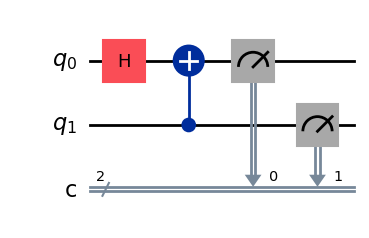

initial


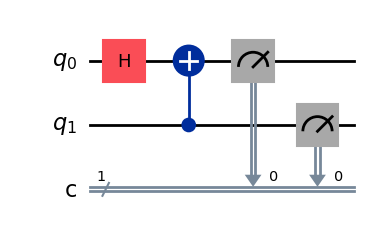

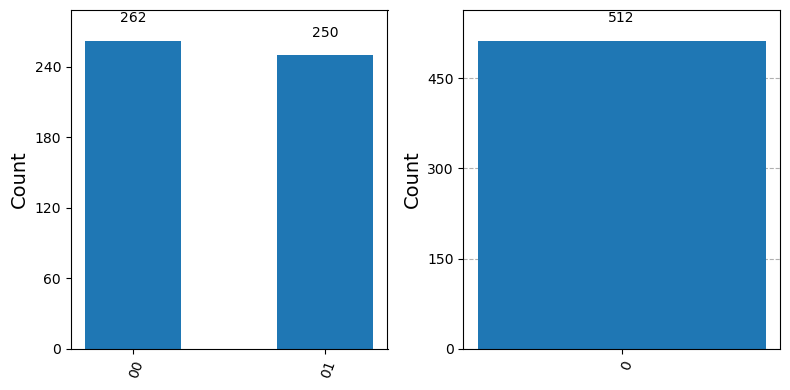

In [6]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("4b; corrected?")
draw_circuit(circuit)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit_c1 = QuantumCircuit(q_reg, c_reg)

circuit_c1.h(q_reg[0])
circuit_c1.cx(q_reg[1], q_reg[0])
circuit_c1.measure(q_reg[0], c_reg[0])
circuit_c1.measure(q_reg[1], c_reg[0])
print("initial")
draw_circuit(circuit_c1)

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
run_with_plot(circuit, shots=512, ax=axs[0], should_show_close=False)
run_with_plot(circuit_c1, shots=512, ax=axs[1], should_show_close=False)
plt.tight_layout()
plt.show()

–ó–¥–µ—Å—å q[1] —Ä–∞–≤–µ–Ω |0>, –æ–Ω —É–ø—Ä–∞–≤–ª—è—é—â–∏–π, –ø–æ—ç—Ç–æ–º—É —Å–æ—Å—Ç–æ—è–Ω–∏–µ q[0] –æ—Ç –Ω–µ–≥–æ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç, –∫—É–±–∏—Ç—ã - –Ω–µ –∑–∞–ø—É—Ç–∞–Ω–Ω—ã–µ, –ø–æ –∏–∑–º–µ—Ä–µ–Ω–∏—é q[1] –Ω–µ —É–∑–Ω–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ g[0].

### 5)
–°–æ–∑–¥–∞–π—Ç–µ —Å—Ö–µ–º—ã, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å. 18 <br>
–ó–∞–ø—É—Å—Ç–∏—Ç–µ 512 —Å–∏–º—É–ª—è—Ü–∏–π –¥–∞–Ω–Ω—ã—Ö —Å—Ö–µ–º. –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

![png17](images/lab1/img18.png)

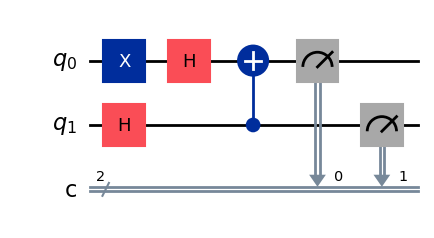

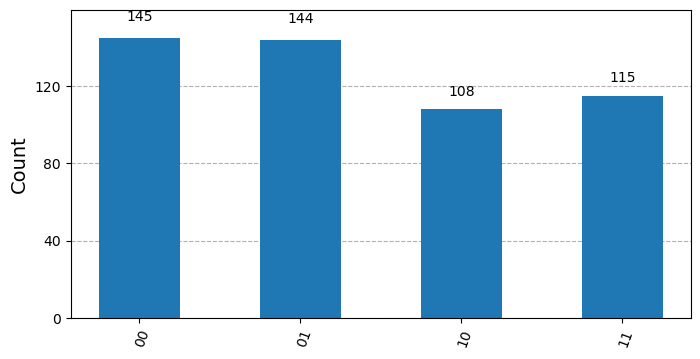

In [7]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

–í—Å–µ –ø–∞—Ä—ã –∫—É–±–∏—Ç–æ–≤ –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é (0.25) –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∏–∑–º–µ—Ä–µ–Ω–∏—è, —Å–æ—Å—Ç–æ—è–Ω–∏–µ –Ω–µ –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–µ

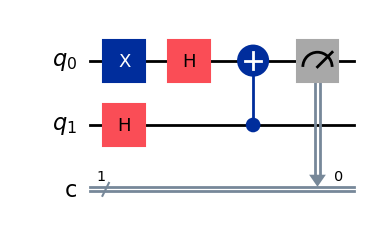

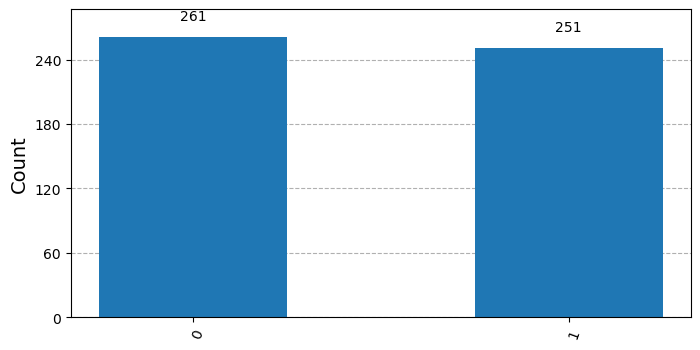

In [8]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)

circuit.x(q_reg[0])
circuit.h(q_reg[1])
circuit.h(q_reg[0])
circuit.cx(q_reg[1], q_reg[0])
circuit.measure(q_reg[0], c_reg[0])

draw_circuit(circuit)

run_with_plot(circuit, shots=512)

–ü–æ –∏–∑–º–µ—Ä–µ–Ω–∏—é –ª–∏—à—å q[0] –Ω–µ –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ q[1], –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –Ω–∞–º –∏–∑–≤–µ—Å—Ç–Ω–æ —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–µ q[0]

### 6)
–°–æ–∑–¥–∞–π—Ç–µ —Å—Ö–µ–º—ã, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å. 19. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö —Å—Ö–µ–º —Å —á–∏—Å–ª–æ–º –∏–∑–º–µ—Ä–µ–Ω–∏–π ‚Äì 1024. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–∏–º—É–ª—è—Ü–∏–∏ –∏ –ø–æ–ª–æ–∂–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ –Ω–∞ Q-—Å—Ñ–µ—Ä–µ. –°–¥–µ–ª–∞–π—Ç–µ
–≤—ã–≤–æ–¥—ã.

![png17](images/lab1/img19.png)

### a)

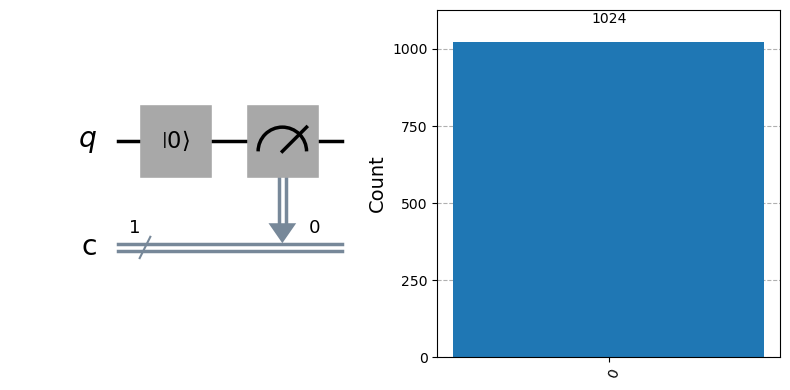

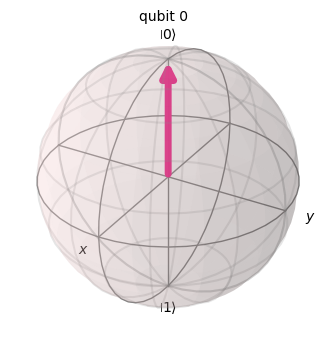

In [9]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()

circuit.reset(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

plot_bloch_multivector(state)

–ö—É–±–∏—Ç —Å–±—Ä–∞—Å—ã–≤–∞–µ—Ç—Å—è –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–µ $|0\rangle$ (–≤ –∫–æ—Ç–æ—Ä–æ–º –ø–æ –¥–µ—Ñ–æ–ª—Ç—É –∏ –ø—Ä–µ–±—ã–≤–∞–µ—Ç), —ç—Ç–æ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ –Ω–∞ —Å—Ñ–µ—Ä–µ –ë–ª–æ—Ö–∞ 


### b)

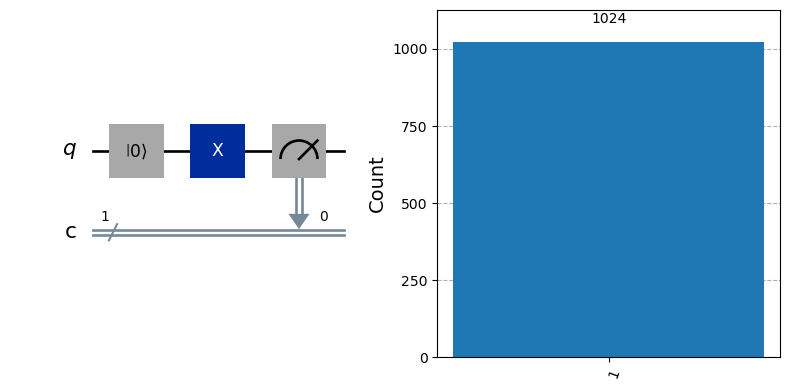

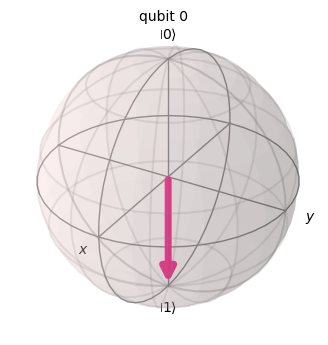

In [10]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()

circuit.reset(q_reg[0])
circuit.x(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

plot_bloch_multivector(state)

–ö—É–±–∏—Ç —Å–±—Ä–∞—Å—ã–≤–∞–µ—Ç—Å—è –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–µ $|0\rangle$, –∑–∞—Ç–µ–º —Å –ø–æ–º–æ—â—å—é X –≥–µ–π—Ç–∞ –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—Å—è –≤ $|1\rangle$, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —Å—Ñ–µ—Ä–æ–π –ë–ª–æ—Ö–∞


### c)

(x, y, z) = (1.0, 0.0, 0.0)
(phi, theta, r) = (0.0, 90.0, 1.0)
(a b): [0.70710678+0.j 0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


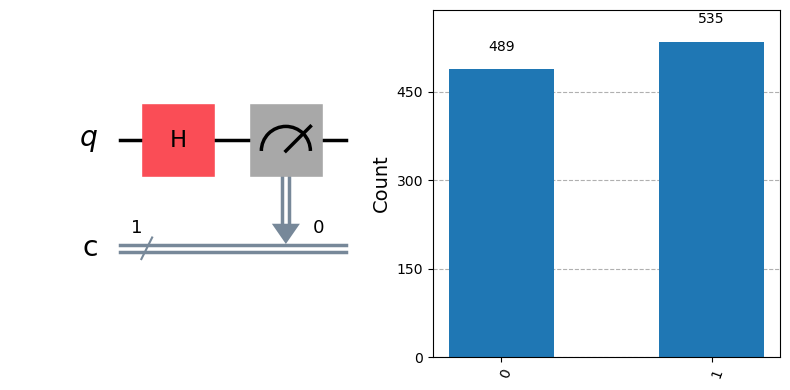

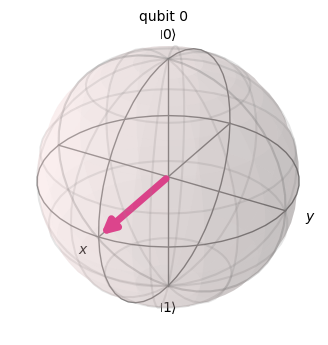

In [11]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

–ó–¥–µ—Å—å —Å–æ—Å—Ç–æ—è–Ω–∏–µ - —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏—è $|0\rangle$ –∏ $|1\rangle$ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ $\frac{1}{\sqrt{2}}$. –£–≥–æ–ª $\theta$ –≤ $90 \degree$ –∫–∞–∫ —Ä–∞–∑ —Ä–∞—Å–ø–æ–ª–æ–≥–∞–µ—Ç –≤–µ–∫—Ç–æ—Ä —Å–æ—Å—Ç–æ—è–Ω–∏—è –Ω–∞ —Å—Ñ–µ—Ä–µ –º–µ–∂–¥—É $|0\rangle$ –∏ $|1\rangle$.


### d)


(x, y, z) = (-1.0, 0.0, 0.0)
(phi, theta, r) = (180.0, 90.0, 1.0)
(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


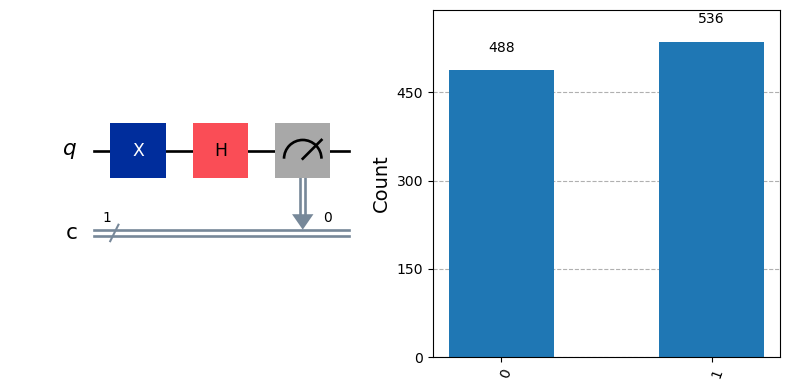

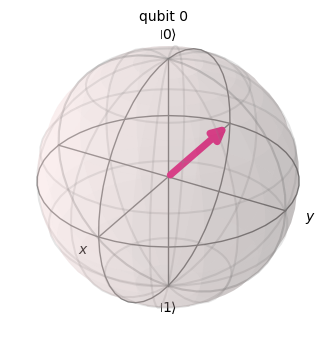

In [12]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

–ó–¥–µ—Å—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ç–∞–∫–∂–µ —Ä–∞–≤–Ω—ã, –Ω–æ –ø–µ—Ä–µ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $b$ –µ—Å—Ç—å –º–∏–Ω—É—Å, —á—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –ø–æ–≤–æ—Ä–æ—Ç—É –Ω–∞ $180 \degree$ –ø–æ $\phi$ –Ω–∞ —Å—Ñ–µ—Ä–µ.

### e)

(x, y, z) = (0.0, -0.86603, 0.5)
(phi, theta, r) = (-90.0, 60.00013167135259, 1.0000039804420782)
(a b): [0.8660254+0.j  0.       -0.5j]
(|a|^2 |b|^2): [0.75 0.25]


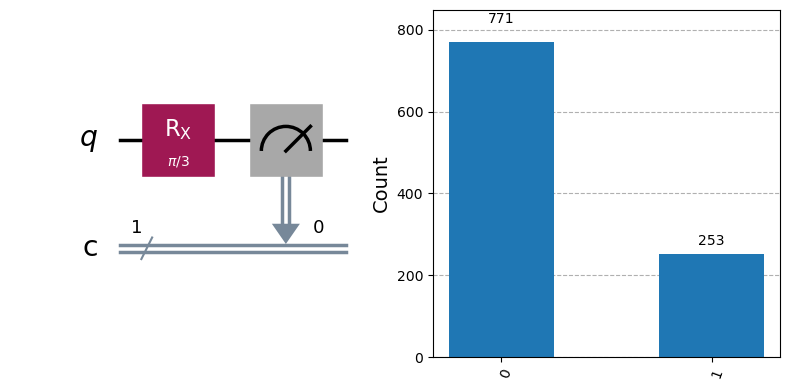

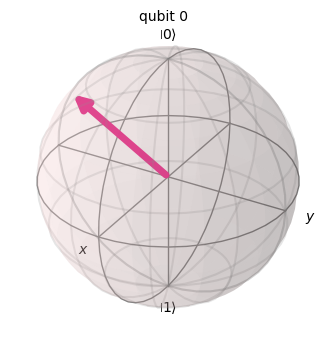

In [13]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

–ì–µ–π—Ç –¥–æ–ª–∂–µ–Ω –±—ã–ª –ø–æ–≤–µ—Ä–Ω—É—Ç—å –≤–µ–∫—Ç–æ—Ä —Å–æ—Å—Ç–æ—è–Ω–∏—è –Ω–∞ $\frac{\pi}{3}$ –≤–æ–∫—Ä—É–≥ $Ox$, —á—Ç–æ –æ–Ω –∏ —Å–¥–µ–ª–∞–ª (–≤–µ–∫—Ç–æ—Ä –æ—Ç–∫–ª–æ–Ω–∏–ª—Å—è –æ—Ç $|0\rangle$ –Ω–∞ $60 \degree$.

### f)

(x, y, z) = (0.0, 0.86603, -0.5)
(phi, theta, r) = (90.0, 119.99986832864741, 1.0000039804420782)
(a b): [0.       -0.5j 0.8660254+0.j ]
(|a|^2 |b|^2): [0.25 0.75]


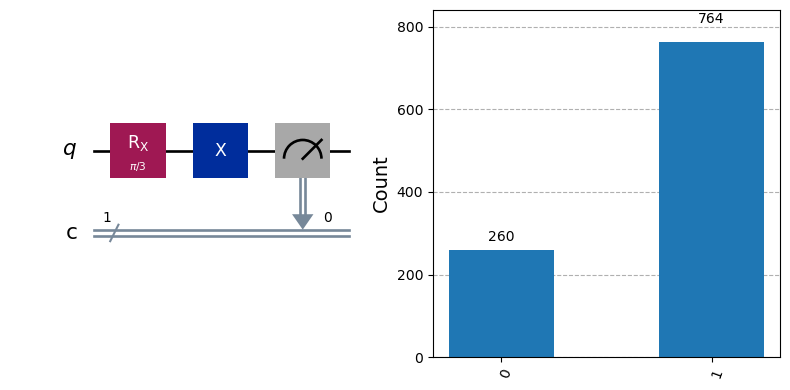

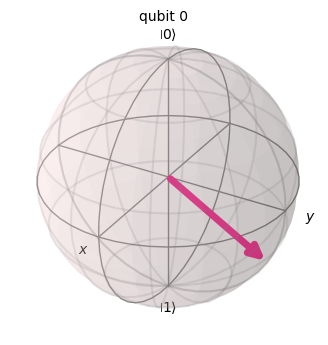

In [14]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(np.pi / 3, q_reg[0])
circuit.x(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
xyz = bloch_coords(state[0], state[1])
print("(x, y, z) =", xyz)
print("(phi, theta, r) =", cartesian_to_spherical(*xyz))
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()
plot_bloch_multivector(state)

–ì–µ–π—Ç $X$ –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—É–Ω–∫—Ç–∞, –ø–æ–º–µ–Ω—è–≤ $a$ –∏ $b$ –º–µ—Å—Ç–∞–º–∏, –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –ø–æ $y$ –∏ $z$ —É–º–Ω–æ–∂–∏–ª–∏—Å—å –Ω–∞ $-1$.

# –£–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ 2 (–≤–∞—Ä–∏–∞–Ω—Ç 14)


### 1.
<br>
–ü–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$

(a b): [0.70710678+0.j 0.70710678+0.j]


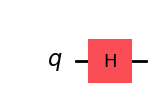

In [15]:
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("(a b):", state.data)

circuit.draw(output='mpl')
plt.show()

### 2.
<br>
–î–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏ –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$


1: (a b): [ 0.70710678+0.j -0.70710678+0.j]
2: (a b): [ 0.70710678+0.j -0.70710678+0.j]


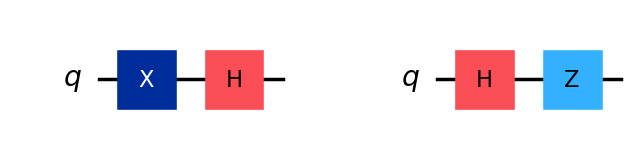

In [16]:
plt.close()
_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("1: (a b):", state.data)

circuit.draw(output='mpl', ax=axs[0])
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
circuit.h(q_reg[0])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
print("2: (a b):", state.data)

circuit.draw(output='mpl', ax=axs[1])
plt.show()

### 3.
<br>
–ü–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ $\frac{1}{\sqrt{2}}\left(-|0\rangle + |1\rangle\right)$


(a b): [-0.70710678+0.j  0.70710678+0.j]


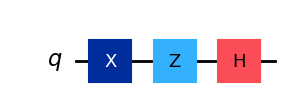

In [17]:
q_reg = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q_reg)
plt.close()
circuit.x(q_reg[0])
circuit.z(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
print("(a b):", state.data)

circuit.draw(output='mpl')
plt.show()

## –í–∞—Ä–∏–∞–Ω—Ç
<br>
–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å $|0\rangle  = 0.25 $, $|1\rangle  = 0.75$

### 4.
–° –ø–æ–º–æ—â—å—é –≤–µ–Ω—Ç–∏–ª—è RX —Å–æ–∑–¥–∞–π—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ (ùëé | 0‚ü© + ùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ
—Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


–î–µ–π—Å—Ç–≤—É—è RX –Ω–∞ $|0\rangle$, –ø–æ–ª—É—á–∞–µ–º $\cos \left( \frac{\theta}{2} \right) |0\rangle -i \sin \left( \frac{\theta}{2} \right) |1\rangle$. –£ –Ω–∞—Å –µ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è $|a|^2 = 0.25$ –∏ $|b|^2 = 0.75$. $\cos^2\left( \frac{\theta}{2} \right) = 0.25$
<br>
$\theta =2 \pi n - \frac{4\pi}{3}, n \in Z$ –∏–ª–∏ $\theta =2 \pi n - \frac{8\pi}{3}, n \in Z$
<br>
–ß—Ç–æ–±—ã –≤—ã–ø–æ–ª–Ω—è–ª–æ—Å—å $- \sin \left( \frac{\theta}{2} \right) < 0$, –≤–æ–∑—å–º—ë–º –∑–Ω–∞—á–µ–Ω–∏–µ $\theta =  \frac{2\pi}{3}$.
<br>
–ó–∞—Ç–µ–º –º–æ–∂–Ω–æ –ø–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å –≥–µ–π—Ç–æ–º S, —á—Ç–æ–±—ã —É–º–Ω–æ–∂–∏—Ç—å $b$ –Ω–∞ $i$ (–Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —ç—Ç–æ –Ω–µ –ø–æ–≤–ª–∏—è–µ—Ç, –ø—Ä–æ—Å—Ç–æ –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –º–∏–Ω—É—Å–∞ –∏ $i$).

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


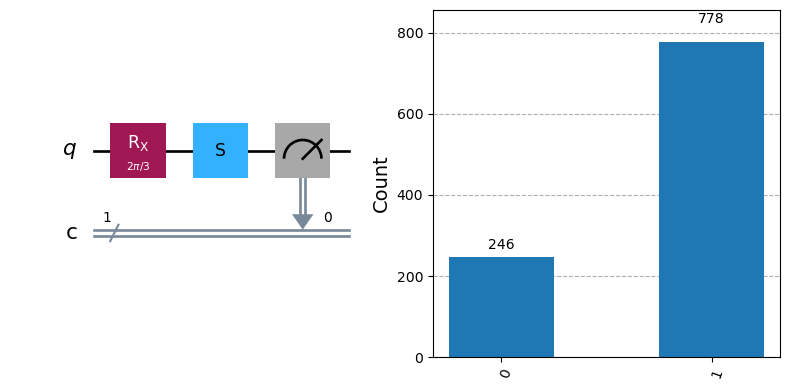

In [18]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(2 * np.pi / 3, q_reg[0])
circuit.s(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 5.
–° –ø–æ–º–æ—â—å—é –æ–¥–Ω–æ–∫—É–±–∏—Ç–Ω–æ–≥–æ –≤–µ–Ω—Ç–∏–ª—è RY –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü© + ùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã
–≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

–ó–¥–µ—Å—å, –¥–µ–π—Å—Ç–≤—É—è –Ω–∞ $|0\rangle$, –ø–æ–ª—É—á–∞–µ–º $\cos \left( \frac{\theta}{2} \right) |0\rangle + \sin \left( \frac{\theta}{2} \right) |1\rangle$, —Ç–∞–∫–∂–µ $\theta =2 \pi n - \frac{4\pi}{3}, n \in Z$ –∏–ª–∏ $\theta =2 \pi n - \frac{8\pi}{3}, n \in Z$.
<br>
–ß—Ç–æ–±—ã –≤—ã–ø–æ–ª–Ω—è–ª–æ—Å—å $\sin \left( \frac{\theta}{2} \right) > 0$, –≤–æ–∑—å–º—ë–º –∑–Ω–∞—á–µ–Ω–∏–µ $\theta =  \frac{2\pi}{3}$.

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


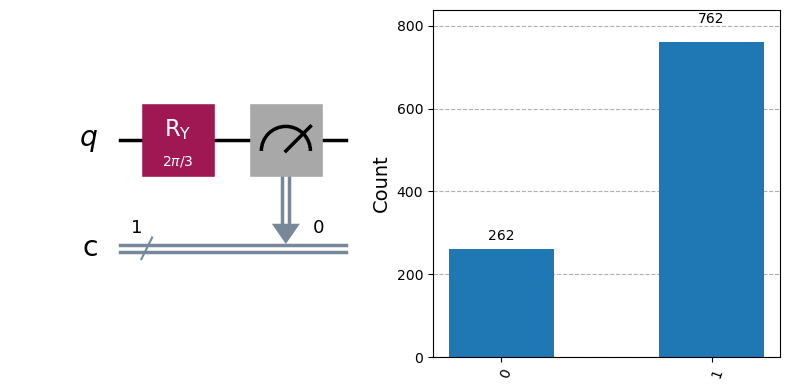

In [19]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 6.
<br>
–° –ø–æ–º–æ—â—å—é –æ–¥–Ω–æ–∫—É–±–∏—Ç–Ω–æ–≥–æ –≤–µ–Ω—Ç–∏–ª—è U –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü© + ùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã
–≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


![a](images/lab1/U_gate.png)

–ï—Å–ª–∏ –≤–∑—è—Ç—å –ª—é–±—É—é $\lambda$ –∏ $\phi  = 0$, –∑–∞–¥–∞—á–∞ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–π.

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


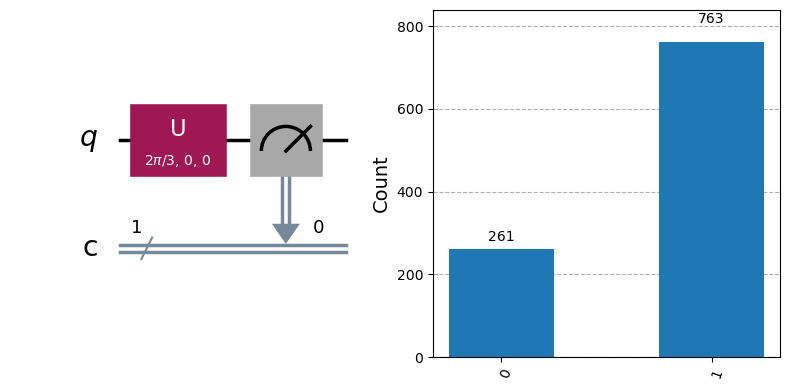

In [20]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 7.
<br>
–° –ø–æ–º–æ—â—å—é –æ–¥–Ω–æ–∫—É–±–∏—Ç–Ω–æ–≥–æ –≤–µ–Ω—Ç–∏–ª—è RX –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü© ‚àíùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã
–≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø. 4, –Ω–æ –±–µ—Ä—ë–º –¥—Ä—É–≥–æ–µ $\theta$ –∏–ª–∏ –Ω–µ –¥–æ–∏–Ω–æ–∂–∞–µ–º $b$ –Ω–∞ $i$, –æ—Å—Ç–∞–≤–∏–≤ –µ–≥–æ –º–Ω–∏–º—É—é —á–∞—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π.

(a b): [0.5+0.j        0. -0.8660254j]
(|a|^2 |b|^2): [0.25 0.75]


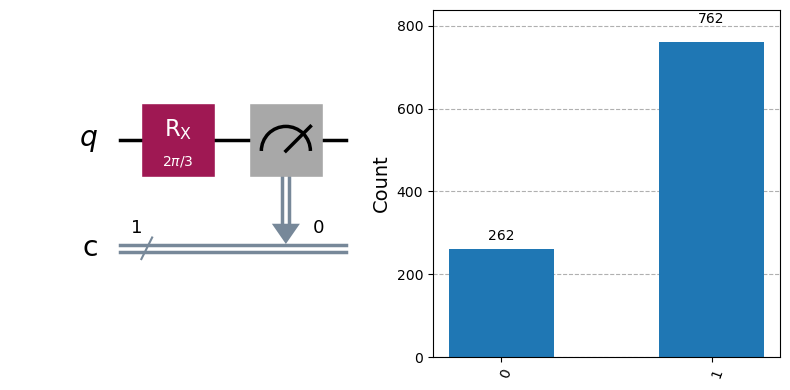

In [21]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 8.
<br>
–° –ø–æ–º–æ—â—å—é –æ–¥–Ω–æ–∫—É–±–∏—Ç–Ω–æ–≥–æ –≤–µ–Ω—Ç–∏–ª—è RY –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü© ‚àíùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã
–≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


–ë–µ—Ä—ë–º $\theta = - \frac{2 \pi}{3}$, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π $\sin$ –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π $\cos$ –æ—Ç $\frac{\theta}{2}$.

(a b): [ 0.5      +0.j -0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


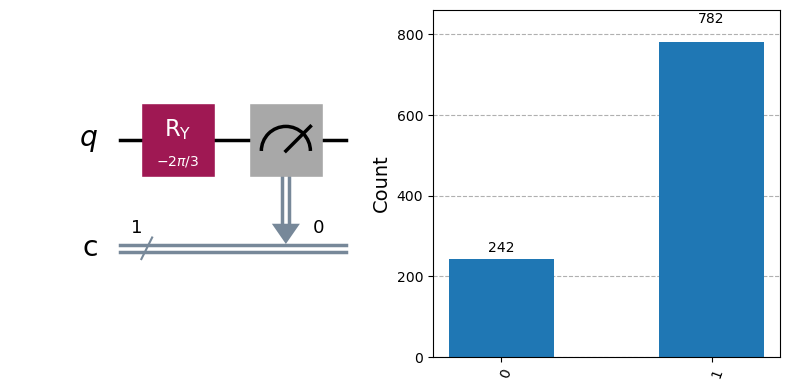

In [22]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(- 2 * np.pi / 3, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 9.
<br>
–° –ø–æ–º–æ—â—å—é –æ–¥–Ω–æ–∫—É–±–∏—Ç–Ω–æ–≥–æ –≤–µ–Ω—Ç–∏–ª—è U –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü© ‚àíùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã
–≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø. 6, –Ω–æ —Å –∑–∞–º–µ–Ω–æ–π $\theta =  \frac{2 \pi}{3}$ –Ω–∞ $\theta =  -\frac{2 \pi}{3}$.

(a b): [ 0.5      +0.j -0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


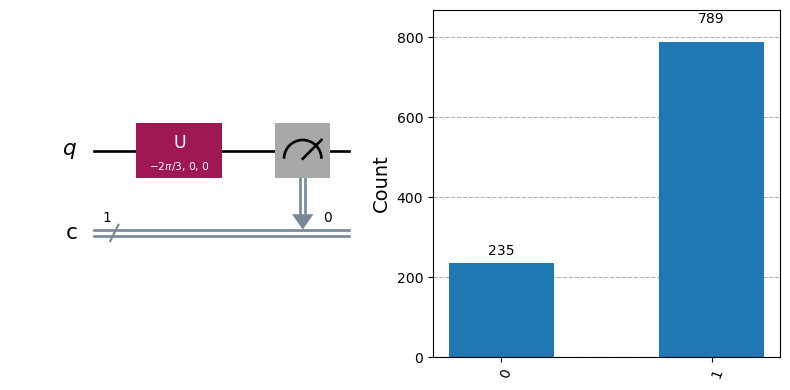

In [23]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(- 2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 10.
<br>
–° –ø–æ–º–æ—â—å—é –≤–µ–Ω—Ç–∏–ª–µ–π –ø–æ–≤–æ—Ä–æ—Ç–∞ –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ (ùëé | 0‚ü©+ùëè | 1‚ü©). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è, –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü–µ 1. –í—ã–ø–æ–ª–Ω–∏—Ç–µ
—Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


—Å–º. –ø—É–Ω–∫—Ç 6

(a b): [0.5      +0.j 0.8660254+0.j]
(|a|^2 |b|^2): [0.25 0.75]


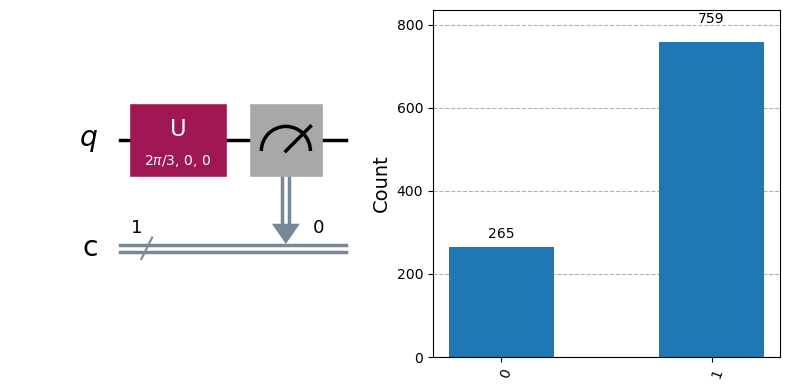

In [24]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.u(2 * np.pi / 3, 0, 0, q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

### 11.
<br>
–° –ø–æ–º–æ—â—å—é –≤–µ–Ω—Ç–∏–ª—è RX –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ (ùëé | 0‚ü©+ùëè |
1‚ü©) –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—Ä–∏–∞–Ω—Ç–æ–º, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º –≤ —Ç–∞–±–ª–∏—Ü–µ 1. –î–∞–ª–µ–µ —Å–æ—Å—Ç–∞–≤—å—Ç–µ
—Å—Ö–µ–º—É, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—É—é –Ω–∞ —Ä–∏—Å. 20. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

![](images/lab1/img20.png)

(a b) before h: [0.5+0.j        0. +0.8660254j]
(phi, theta, r) = (90.0, 119.99986832864741, 1.0000039804420782)
(|a|^2 |b|^2) before h: [0.25 0.75]
(a b): [0.35355339+0.61237244j 0.35355339-0.61237244j]
(|a|^2 |b|^2): [0.5 0.5]
(phi, theta, r) = (-119.99986832864741, 90.0, 1.0000039804420782)


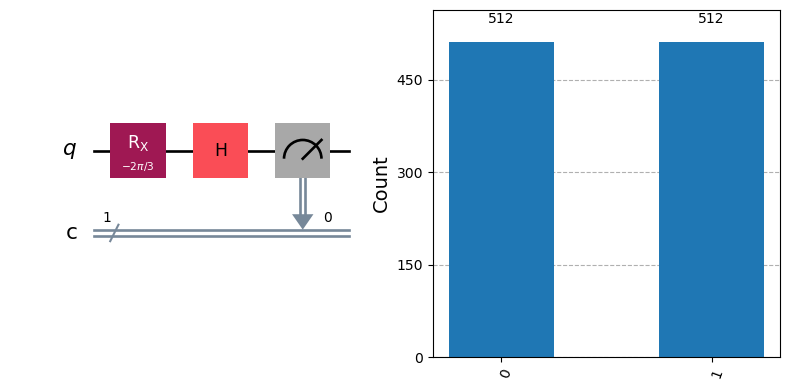

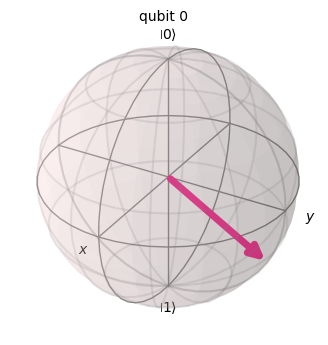

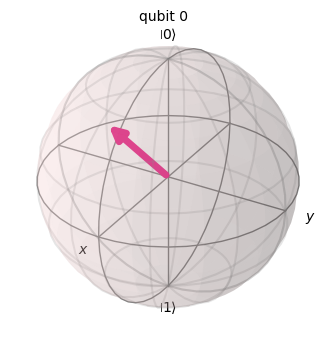

In [25]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(- 2 * np.pi / 3, q_reg[0])
state_before_h = Statevector.from_instruction(circuit)
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b) before h:", state_before_h.data)
print("(phi, theta, r) =", cartesian_to_spherical(*bloch_coords(state_before_h[0], state_before_h[1])))
print("(|a|^2 |b|^2) before h:", state_before_h.probabilities())
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())
print("(phi, theta, r) =", cartesian_to_spherical(*bloch_coords(state[0], state[1])))

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plot_bloch_multivector(state_before_h)
plot_bloch_multivector(state)
plt.show()

–ì–µ–π—Ç –ê–¥–∞–º–∞—Ä–∞ –ø–æ–≤–µ—Ä–Ω—É–ª –≤–µ–∫—Ç–æ—Ä —Å–æ—Å—Ç–æ—è–Ω–∏—è –≤–æ–∫—Ä—É–≥ $\frac{Ox + Oz}{\sqrt{2}}$ –Ω–∞ $\pi$.

### 12.
–° –ø–æ–º–æ—â—å—é –≤–µ–Ω—Ç–∏–ª—è Rx –ø–æ–ª—É—á–∏—Ç–µ –∫—É–±–∏—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏ a|0> +
b|1>. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è, –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü–µ 1.
–î–∞–ª–µ–µ —Å–æ—Å—Ç–∞–≤—å—Ç–µ —Å—Ö–µ–º—É, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—É—é –Ω–∞ —Ä–∏—Å. 21. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é.
–ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

![](images/lab1/img21.png)

(a b): [0.5+0.j        0. +0.8660254j]
(|a|^2 |b|^2): [0.25 0.75]


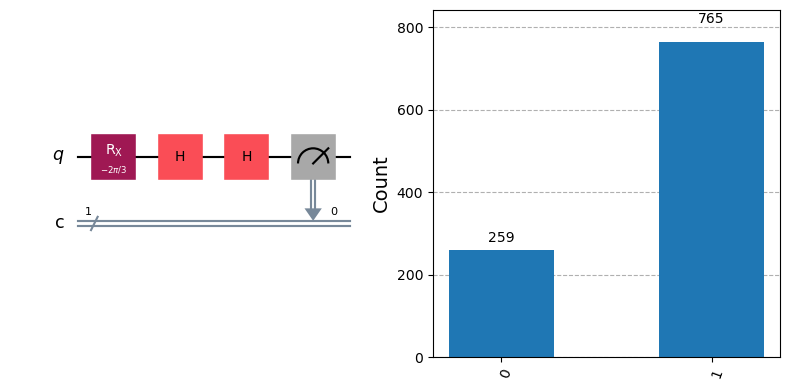

In [26]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.rx(- 2 * np.pi / 3, q_reg[0])
circuit.h(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])

print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–î–ª—è –≥–µ–π—Ç–∞ $H$ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è $HH$ = $I$. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–æ—Å—å –≤ –∑–∞–¥–∞–Ω–∏–∏ —Ç–µ–º, —á—Ç–æ –¥–≤–∞ –ø—Ä–∏–º–µ–Ω—ë–Ω–Ω—ã—Ö –ø–æ–¥—Ä—è–¥ –≥–µ–π—Ç–∞ $H$ –≤ –∏—Ç–æ–≥–µ –≤–µ—Ä–Ω—É–ª–∏ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–æ—Å–ª–µ –ø–æ–≤–æ—Ä–æ—Ç–∞ $RX$, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –æ—Å—Ç–∞–ª–æ—Å—å –ø—Ä–µ–∂–Ω–∏–º.

### 13.
–°–æ–±–µ—Ä–∏—Ç–µ –∫–≤–∞–Ω—Ç–æ–≤—ã–µ —Å—Ö–µ–º—ã –ø–æ–∫–∞–∑–∞–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å. 22. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é.
–ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

![](images/lab1/img22.png)

### a)

(a b): [0.70710678+0.j 0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


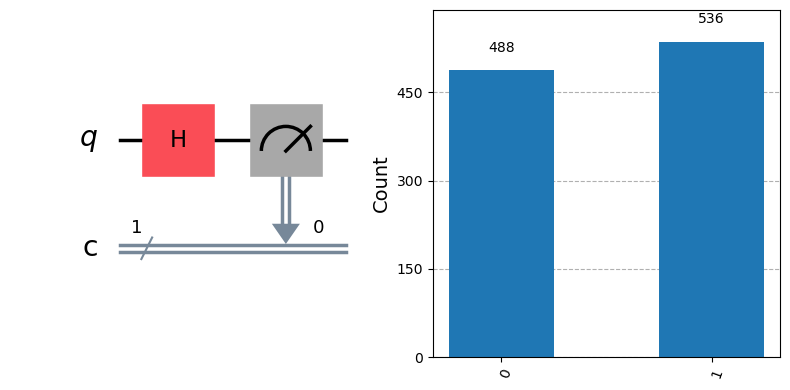

In [27]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–ü—Ä–∏–º–µ–Ω—è—è –≥–µ–π—Ç $H$ –∫ $|0\rangle$, –ø–æ–ª—É—á–∞–µ–º $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. –†–µ–∑—É–ª—å—Ç–∞—Ç —Å–∏–º—É–ª—è—Ü–∏–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç–µ–æ—Ä–∏–∏.

### b)

(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


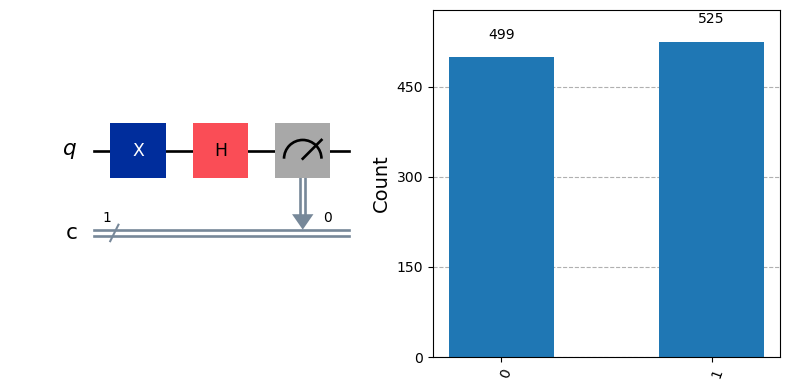

In [28]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–ò–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º $|0\rangle$, –∑–∞—Ç–µ–º, –ø—Ä–∏–º–µ–Ω—è—è –≥–µ–π—Ç $H$ –∫ $|1\rangle$, –ø–æ–ª—É—á–∞–µ–º $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. –ö–≤–∞–¥—Ä–∞—Ç—ã –º–æ–¥—É–ª–µ–π $a$ –∏ $b$ —Ä–∞–≤–Ω—ã, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ä–∞–≤–Ω–æ–≤–µ—Ä–æ—è—Ç–Ω—ã. –†–µ–∑—É–ª—å—Ç–∞—Ç —Å–∏–º—É–ª—è—Ü–∏–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç–µ–æ—Ä–∏–∏.

### c)

(a b): [ 0.70710678+0.j -0.70710678+0.j]
(|a|^2 |b|^2): [0.5 0.5]


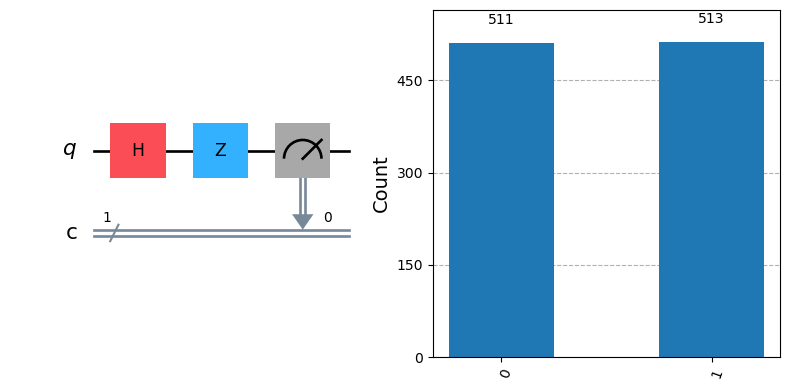

In [29]:
q_reg = QuantumRegister(1, 'q')
c_reg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
print("(a b):", state.data)
print("(|a|^2 |b|^2):", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–í–µ–Ω—Ç–∏–ª—å $Z$ —É–º–Ω–æ–∂–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ $b$ –Ω–∞ $-1$, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—É–Ω–∫—Ç–æ–º $a$ –Ω–µ –º–µ–Ω—è—é—Ç—Å—è.

### 14.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ –∫–≤–∞–Ω—Ç–æ–≤—ã–µ —Å—Ö–µ–º—ã –ø–æ–∫–∞–∑–∞–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å. 23. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é.
–ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

![](images/lab1/img23.png)

### a)
<br>
–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –ø–µ—Ä–≤–∞—è —Ü–∏—Ñ—Ä–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç q[1], –≤—Ç–æ—Ä–∞—è - q[0].

In [ ]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.h(q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–ü–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∫ –∫–∞–∂–¥–æ–º—É –∫—É–±–∏—Ç—É $H$ –∏ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏–π, –ø–æ–ª—É—á–∞–µ–º –∫–æ—ç—Ñ. $0.5$ –ø–µ—Ä–µ–¥ –∫–∞–∂–¥—ã–º –∏–∑ —Å–æ—Å—Ç–æ—è–Ω–∏–π $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$, —Ç–æ–≥–¥–∞ –∫–∞–∂–¥–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ä–∞–≤–Ω–∞ $0.25$.

### b)

state: [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
probas: [0.25 0.25 0.25 0.25]


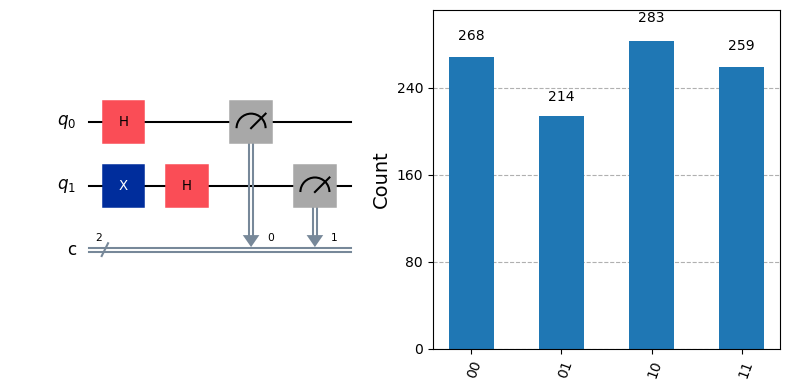

In [62]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.h(q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–ó–¥–µ—Å—å –ø–µ—Ä–µ–º–Ω–æ–∂–∞—é—Ç—Å—è $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ –∏ $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. –ò–∑-–∑–∞ —ç—Ç–æ–≥–æ —É –¥–≤—É—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å–æ—Å—Ç–æ—è–Ω–∏–π –º–µ–Ω—è—é—Ç—Å—è –∑–Ω–∞–∫–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –Ω–µ –º–µ–Ω—è—é—Ç—Å—è.